In [37]:
import argparse

import mlx.core as mx
import numpy as np
from PIL import Image
from tqdm import tqdm

from stable_diffusion import StableDiffusion

This will download all the weights from HF hub and load the models in memory

In [38]:
sd = StableDiffusion()
steps = 100
images = 4

This creates a python generator that returns the latent produced by the reverse diffusion process.

Because MLX is lazily evaluated iterating over this generator doesn't actually perform the computation until mx.eval() is called.

In [39]:
# txt = "A photo of an astronaut riding a horse on Mars."
txt = "Two beautiful Chinese girls wearing cheongsams are drinking tea in the tea room, and a Chinese Landscape Painting is hanging on the wall, the girl on the left is black ponytail in red cheongsam, the girl on the right is white ponytail in orange cheongsam."
latent_generator = sd.generate_latents(txt, n_images=images, num_steps=steps)

Here we are evaluating each diffusion step but we could also evaluate once at the end.

In [40]:
for x_t in tqdm(latent_generator, total=steps):
    mx.eval(x_t)

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


Now x_t is the last latent from the reverse process aka x_0. We can decode it into an image using the stable diffusion VAE.

In [41]:
decoded = []
for i in tqdm(range(0, images, 1)):
    decoded.append(sd.decode(x_t[i : i + 1]))
    mx.eval(decoded[-1])

100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Arrange them on a grid

In [42]:
x = mx.concatenate(decoded, axis=0)
x = mx.pad(x, [(0, 0), (8, 8), (8, 8), (0, 0)])
B, H, W, C = x.shape
x = x.reshape(1, B // 1, H, W, C).transpose(0, 2, 1, 3, 4)
x = x.reshape(1 * H, B // 1 * W, C)
x = (x * 255).astype(mx.uint8)

In [43]:
img = Image.fromarray(np.array(x))

Display the image

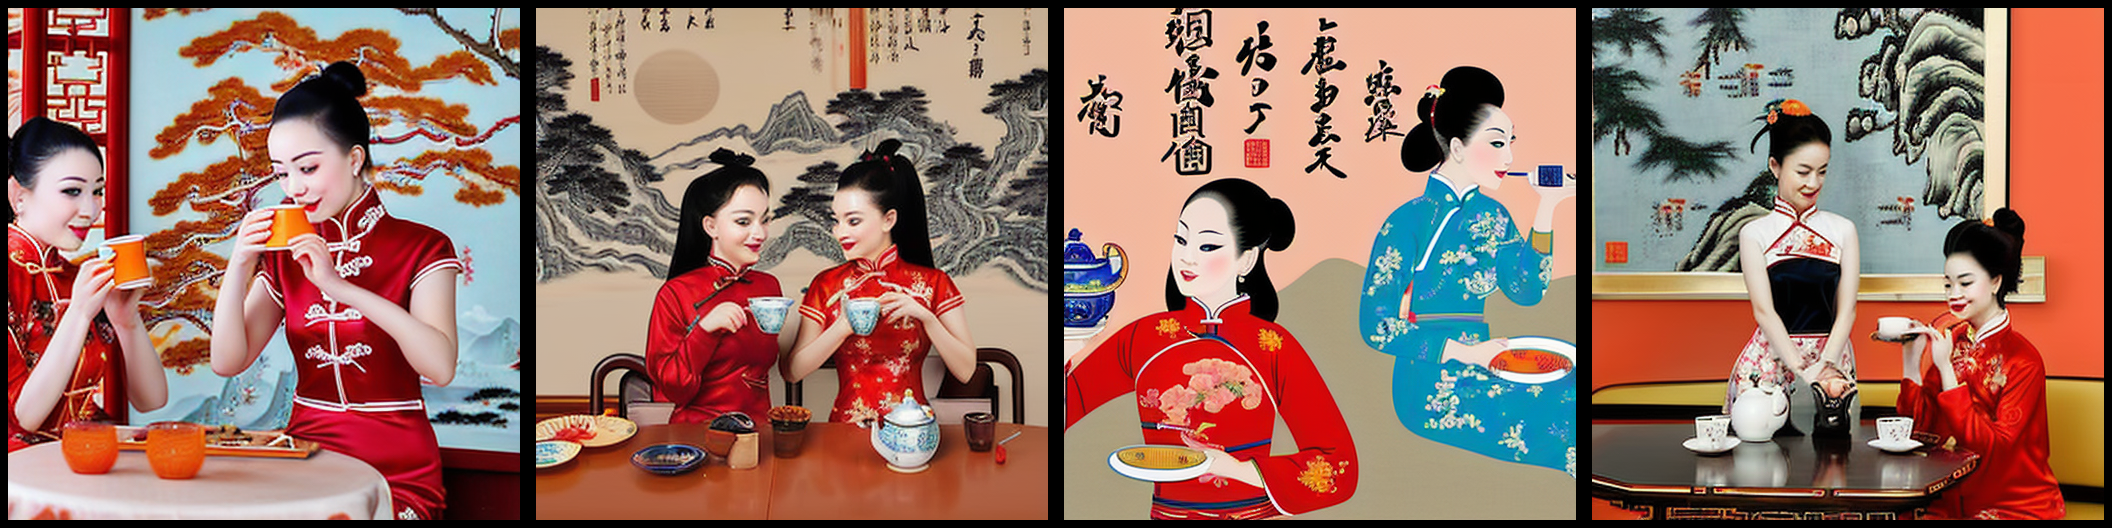

In [44]:
from IPython.display import display

display(img)